<h1>Sentiment Analysis NLP Model</h1>

<h3>importing dataset</h3>

In [1]:
import pandas as pd
df = pd.read_csv("IMDB Dataset.csv")
df = df[:30000]
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
for pos, i in enumerate(df["review"].head()):
    print(str(i))
    if pos

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [2]:
len(df)

30000

<h2>cleaning data</h2>

In [3]:
dummies = pd.get_dummies(df["sentiment"])
dummies.head(5)

,negative,positive
0,False,True
1,False,True
2,False,True
3,True,False
4,False,True


In [4]:
target = dummies["positive"]
target.head(5)

0     True
1     True
2     True
3    False
4     True
Name: positive, dtype: bool

In [5]:
df.drop("sentiment",axis="columns",inplace = True)

In [6]:
df.head(5)

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


<h2>training and testing data spliting</h2>

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df["review"],target,test_size = 0.2)

<h2>TF-IDF vectorization (tokenization)</h2>

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
X_train_count = v.fit_transform(X_train)

In [9]:
X_train_count.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03918229, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<h2>Creating Multinomial naive bayes model and fitting the data</h2>

In [10]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,Y_train)

MultinomialNB()

<h2>testing the score</h2>

In [11]:
t = v.transform(X_test)
model.score(t,Y_test)

0.868

<h2>Predictions</h2>

In [14]:
comments = [
    "I liked is so much",
    "this is not good, shit and bad",
    "very awful video",
    "My preasure to watch this amazing video, very great",
    "pretty and beautiful"
]
comments_count = v.transform(comments)
model.predict(comments_count)

array([ True, False, False,  True,  True])

In [15]:
y_pred = model.predict(v.transform(X_test))

<h2>plotting heatmap</h2>

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred, labels=[0,1])

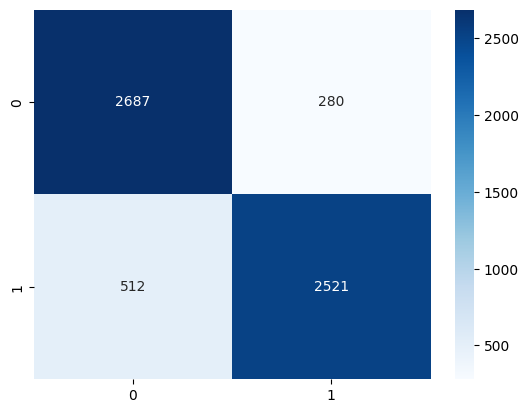

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, cmap = "Blues", annot = True, fmt = "d")
plt.show()

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.868

<h2>dumping the model and transformer</h2>

In [19]:
import joblib
jb = joblib.dump(model,"sentiment_analysis_model.joblib")

In [20]:
v_dump = joblib.dump(v,"v_dump.joblib")